In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from sns_toolbox.neurons import SpikingNeuron
from sns_toolbox.connections import SpikingSynapse
from sns_toolbox.networks import Network
from sns_toolbox.renderer import render

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Takes spike data string, returns frequency of spikes
def getFreq(data, dt):
    loc = np.where(data == 1)[0]
    freq = []
    for i in range(len(loc)-1):
        freq.append(1 / ((loc[i+1] - loc[i]) * (dt * 0.001)))
    # The first element needs to be removed because this is inner spike, so more spikes than frequencies recorded
    loc = loc[1:] * dt
    return freq, loc

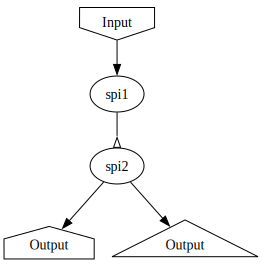

In [3]:
spi = SpikingNeuron()
spi2 = SpikingNeuron(
    threshold_initial_value=1.0
)
spiC = SpikingSynapse(
    max_conductance=6.9,
    reversal_potential=2.0
)

net = Network()
net.add_neuron(spi, name='spi1')
net.add_neuron(spi2, name='spi2')
net.add_connection(spiC, source='spi1', destination='spi2')
net.add_input(dest='spi1')
net.add_output(source='spi2',spiking=False)
net.add_output(source='spi2', spiking=True)

render(net)

In [4]:
dt = 0.01
tmax = 2.2
t = np.arange(0, tmax, dt)

model = net.compile(dt=dt, backend='numpy', debug=False)

inputs = np.zeros([len(t), net.get_num_inputs()]) + 5
data = np.zeros([len(t), net.get_num_outputs_actual()])
spike_line = np.zeros([len(t), 1])

# noisy_threshold = (np.ones([1, len(t)]) + np.random.normal(0, 0.01, len(t))).flatten()

g_mark = None

for i in range(len(t)):
    data[i,:] = model(inputs[i,:])
    
    # spike_line[i] = model.__dict__.get('theta')[1]

data = data.transpose()

[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.]
after[0. 0.]
[0. 0.]
before[0. 0.

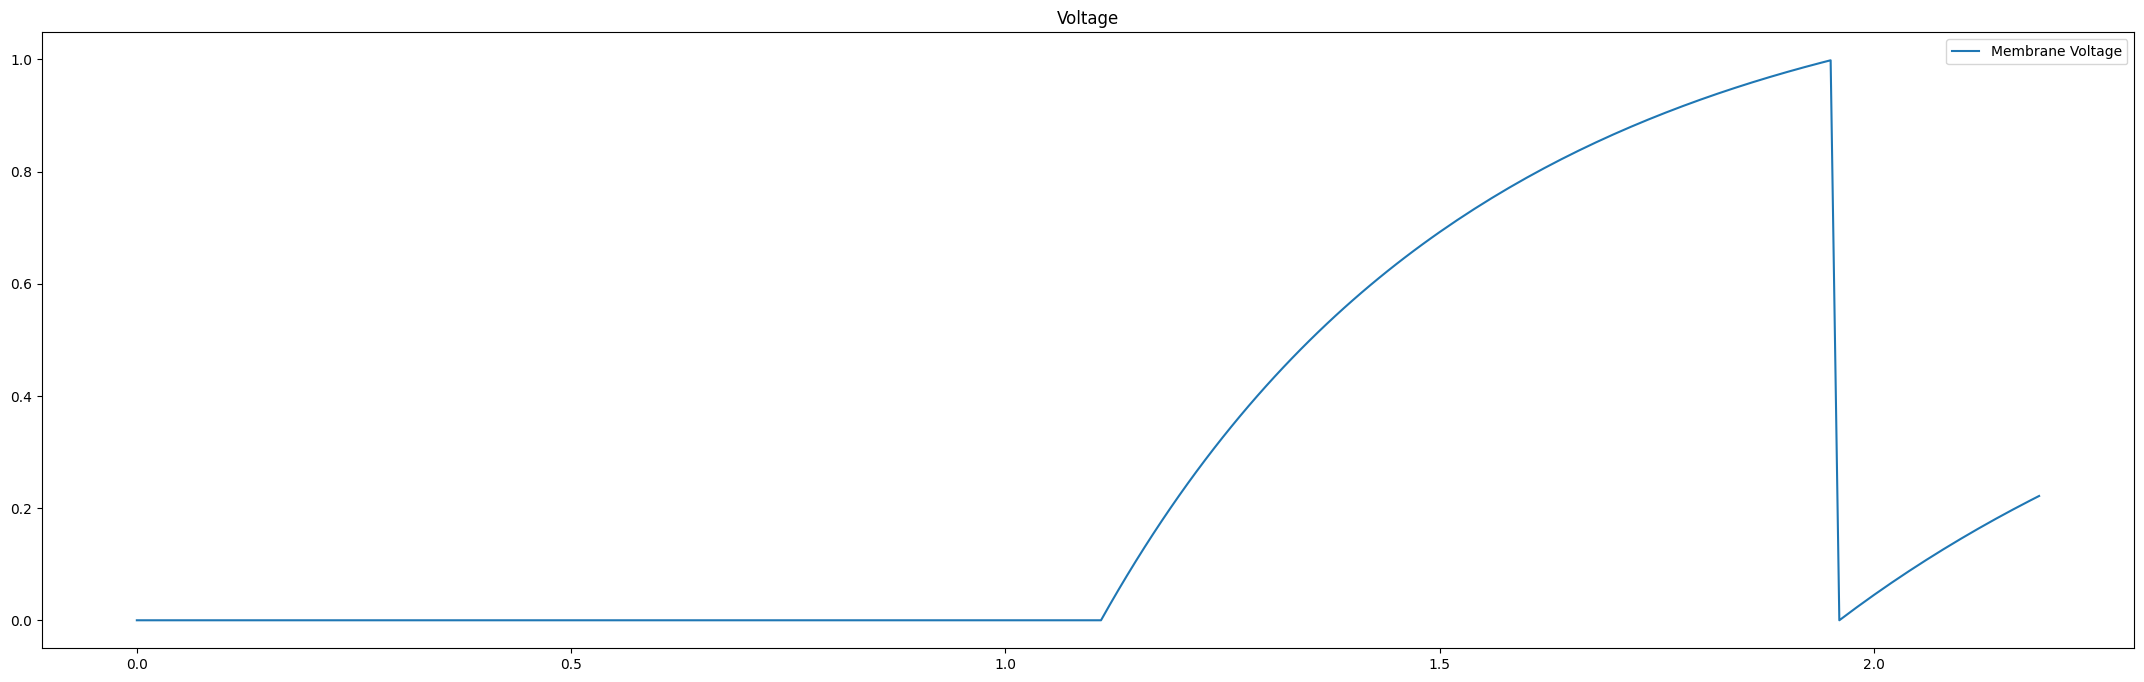

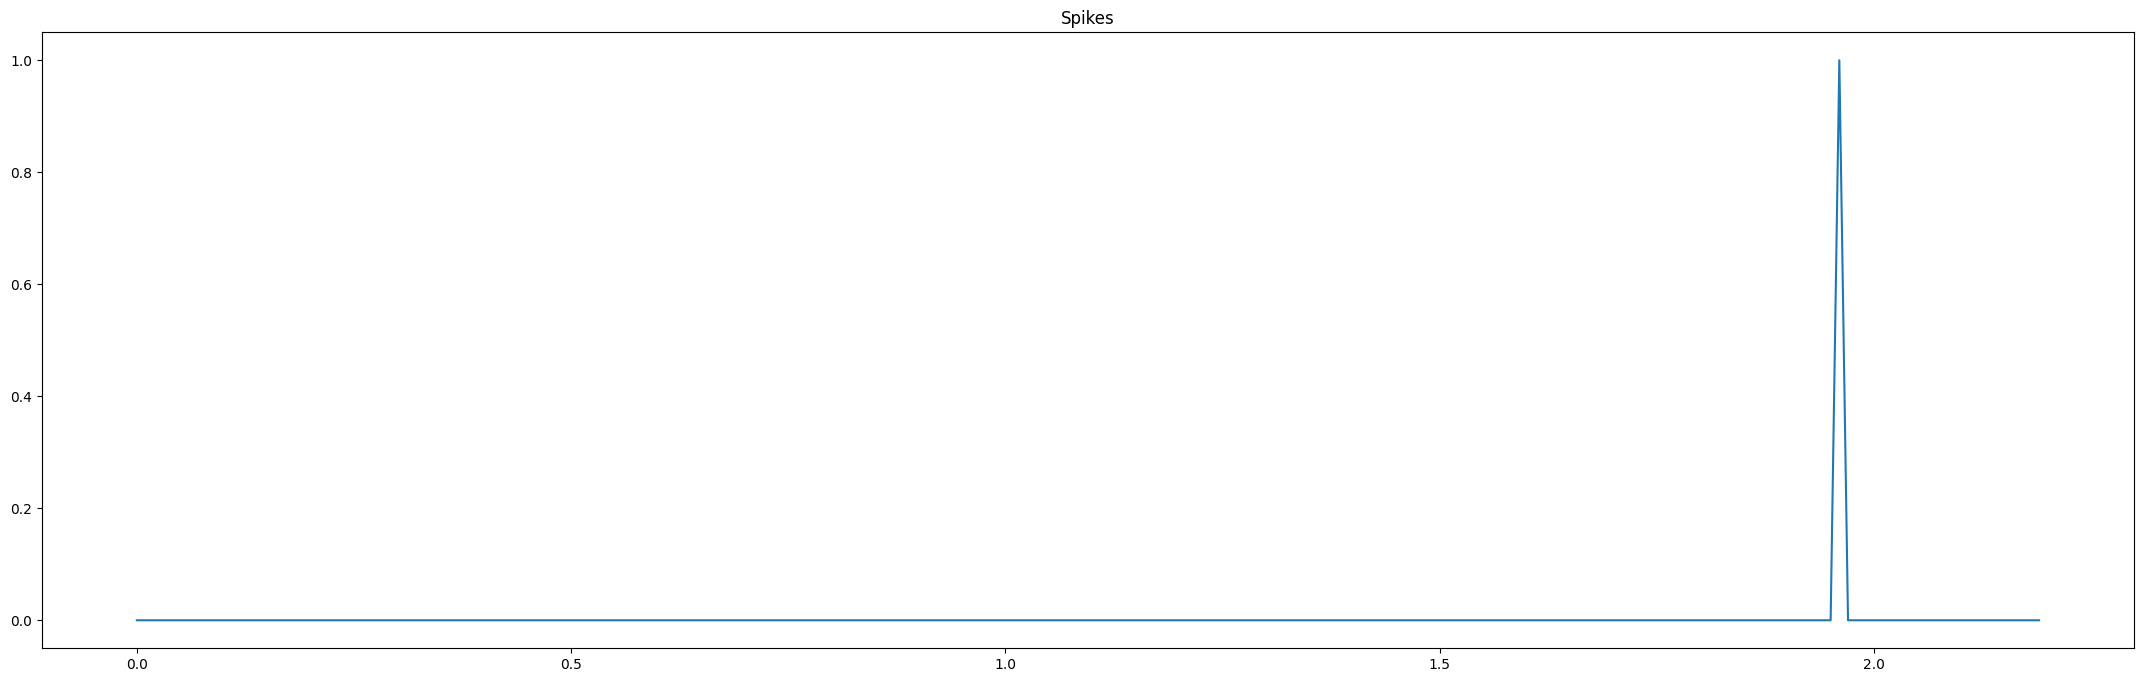

In [5]:
plt.figure(figsize=[27,8])
plt.plot(t, data[0,:], label='Membrane Voltage')
# plt.plot(t, spike_line, '-', color='red', label='Spike Threshold (Theta)')
plt.legend()
plt.title('Voltage')
plt.show()

plt.figure(figsize=[27, 8])
plt.plot(t, data[1,:])
plt.title('Spikes')
plt.show()

In [6]:
print(model.__dict__.get('theta')[1])

1.0


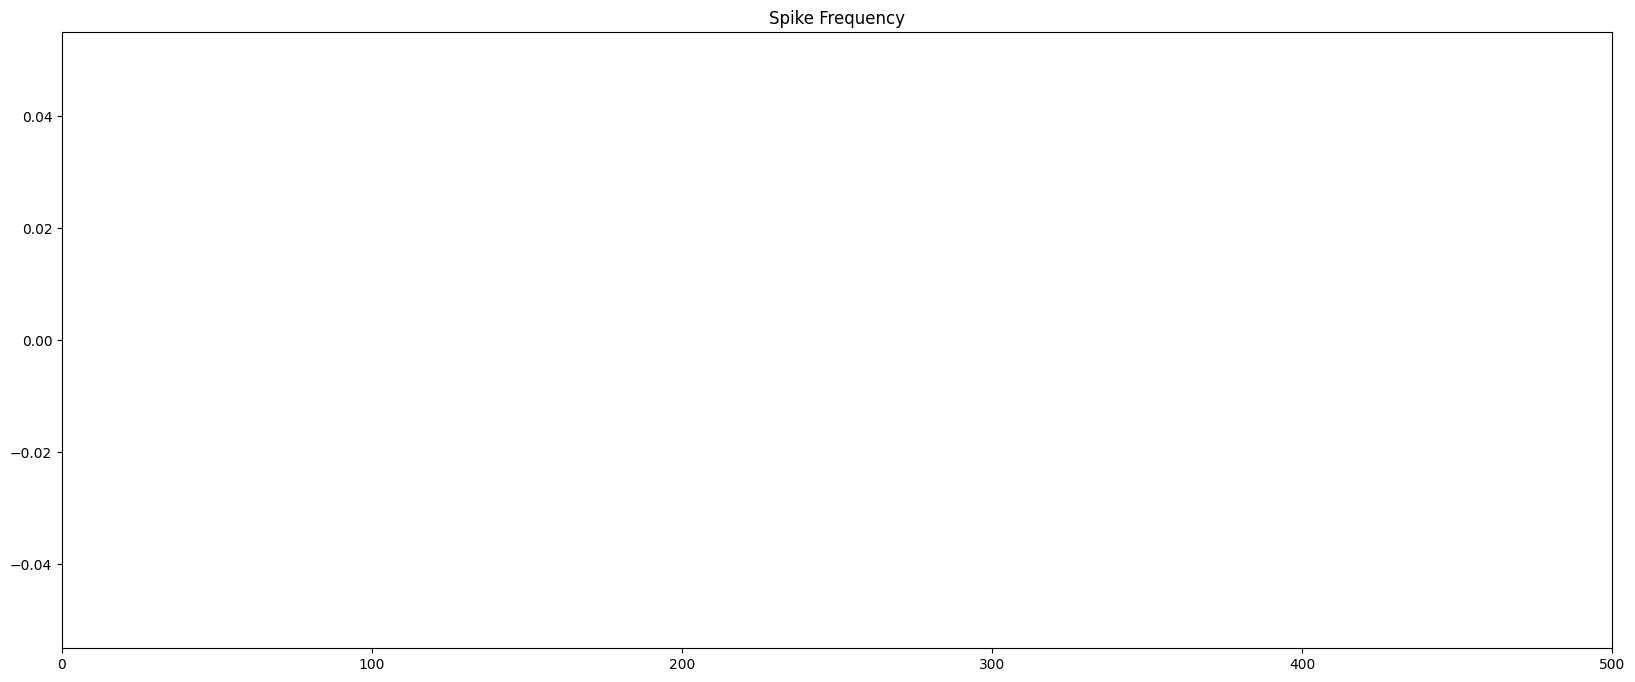

In [7]:
spike_freq, spike_loc = getFreq(data=data[1,:], dt=dt)

plt.figure(figsize=[20, 8])
plt.plot(spike_loc, spike_freq, 'o')
plt.xlim(0, 500)
plt.title('Spike Frequency')
plt.show()

In [8]:
model.__dict__

{'dt': 0.01,
 'name': 'Network',
 'spiking': True,
 'delay': False,
 'electrical': False,
 'electrical_rectified': False,
 'gated': False,
 'num_channels': 0,
 'V': array([0.97219475, 0.22168256]),
 'V_last': array([0.964123  , 0.21378456]),
 'V_0': array([0., 0.]),
 'V_rest': array([0., 0.]),
 'c_m': array([5., 5.]),
 'g_m': array([1., 1.]),
 'i_b': array([0., 0.]),
 'g_max_non': array([[0., 0.],
        [0., 0.]]),
 'del_e': array([[0., 0.],
        [2., 0.]]),
 'e_lo': array([[0., 0.],
        [0., 0.]]),
 'e_hi': array([[1., 1.],
        [1., 1.]]),
 'time_factor_membrane': array([0.002, 0.002]),
 'input_connectivity': array([[1.],
        [0.]]),
 'output_voltage_connectivity': array([[0., 1.],
        [0., 0.]]),
 'num_populations': 2,
 'num_neurons': 2,
 'num_connections': 1,
 'num_inputs': 1,
 'num_outputs': 2,
 'spikes': array([0., 0.]),
 'spike_time': array([0., 0.]),
 'POST1_spike_diff': [],
 'POST2_spike_diff': [],
 'theta_0': array([1., 1.]),
 'theta': array([1., 1.]),
 't

In [9]:
# a = np.ones([1, 5])
# print(a)

# b = [2, 3]
# print(b)

# # a[0][-1] = b[-1]

# # for i in range(len(b)):
# #     a[0][-(i+1)] = b[-(i+1)]

# a[0][-len(b):] = b

# print(a)

# a2 = model.__dict__.get('theta')
# print(a2)
# a2[(len(a2) - len(b)):] = b

# print(a2)